# Epsilon & Greedy Method

## Prepare the packages

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import random
import numpy as np

## Define Coin Toss Task

In [4]:
class CoinToss():

    def __init__(self, head_probs, max_episode_steps=30):
        self.head_probs = head_probs
        self.max_episode_steps = max_episode_steps
        self.toss_count = 0

    def __len__(self):
        return len(self.head_probs)

    def reset(self):
        self.toss_count = 0

    def step(self, action):
        final = self.max_episode_steps - 1
        if self.toss_count < final:
            done = False
        elif self.toss_count == final:
            done = True
        else:
            raise Exception("The step count exceeded maximum. \
                            Please reset env.")

        if action >= len(self.head_probs):
            raise Exception("The No.{} coin doesn't exist.".format(action))
        else:
            head_prob = self.head_probs[action]
            if random.random() < head_prob:
                reward = 1.0
            else:
                reward = 0.0
            self.toss_count += 1
            return reward, done

## Define Agent

In [5]:
class EpsilonGreedyAgent():

    def __init__(self, epsilon):
        self.epsilon = epsilon
        self.V = []

    def policy(self):
        coins = range(len(self.V))
        if random.random() < self.epsilon:
            return random.choice(coins)
        else:
            return np.argmax(self.V)

    def learn(self, env, episode_count=50):
        # Initialize estimation
        N = [0] * len(env)
        self.V = [0] * len(env)

        history = []
        for e in range(episode_count):
            env.reset()
            done = False
            rewards = []
            while not done:
                selected_coin = self.policy()
                reward, done = env.step(selected_coin)
                rewards.append(reward)

                n = N[selected_coin]
                coin_average = self.V[selected_coin]
                new_average = (coin_average * n + reward) / (n + 1)
                N[selected_coin] += 1
                self.V[selected_coin] = new_average
            else:
                history.append(np.mean(rewards))

        return history

## Verification of epsilon exploration

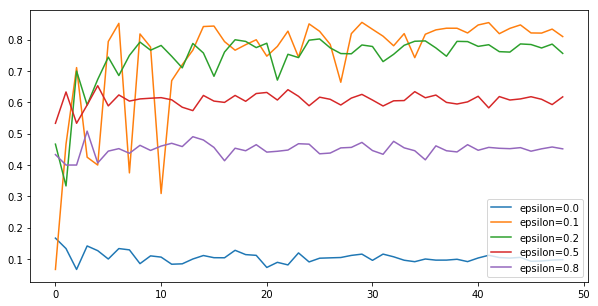

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

env = CoinToss([0.1, 0.5, 0.1, 0.9, 0.1])
epsilons = [0.0, 0.1, 0.2, 0.5, 0.8]
episode_counts = range(1, 50)
result = {}
for e in epsilons:
    agent = EpsilonGreedyAgent(epsilon=e)
    means = []
    for c in episode_counts:
        history = agent.learn(env, episode_count=c)
        means.append(np.mean(history))
    result["epsilon={}".format(e)] = means
result = pd.DataFrame(result)
result.plot.line(figsize=(10, 5))